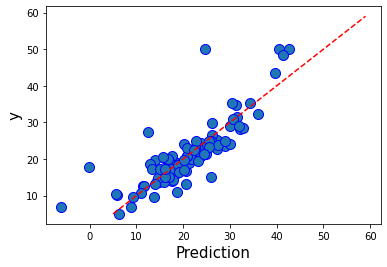

R2: 0.6687594935356301


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

np.random.seed(42)
data = pd.read_csv('../data/BostonHousing.csv', header=(0))
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]
p = 0.2 # fracao e elementos no conjnto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

lm = LinearRegression()
lm.fit(x_train, y_train)

y_pred = lm.predict(x_test)

fig = plt.figure()
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

# mostra os valores preditos e originais
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show(True)

R2 = r2_score(y_test, y_pred)
print('R2:', R2)

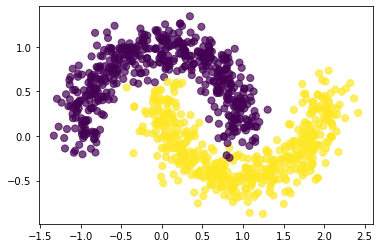

Recall: 0.9847117794486215
Accuracy: 0.985


In [8]:
from sklearn import datasets
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score

plt.figure(figsize=(6,4))
n_samples = 1000
data  = datasets.make_moons(n_samples=n_samples, noise=.15, random_state=42)
X = data[0]
y = data[1]
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.show(True)
 
p = 0.2 # fracao de elementos no conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 2)

model = tree.DecisionTreeClassifier(criterion = 'gini', random_state = 42)
# Ajusta o modelo usando os dados de treinamento
model.fit(x_train,y_train)
# realizar a predição
y_pred = model.predict(x_test) 

score = accuracy_score(y_pred, y_test)
print('Recall:', recall_score(y_test, y_pred, average="macro"))
print('Accuracy:', score)